# Overview:
1. *Classify a Randomized clinical trials (RCTs) abstarct to subclasses for easier to read and understand*.
2. *Basically convert a medical abstarct to chunks of sentences of particaular classes like "Background", "Methods", "Results" and "Conclusion".* 
3. *Its a Many to One Text Classification problem. Where we categorize a sequence to a prticular class.*

# Dataset Used:

[*PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071)

In [3]:
# Getting the dataset from author's Github repo
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.


In [4]:
!ls pubmed-rct

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [5]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


* train.txt - training samples.
* dev.txt - dev is short for development set, which is another name for validation set (in our case, we'll be using and referring to this file as our validation set).
* test.txt - test samples.

In [6]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [7]:
import os
filenames = [data_dir +filename for filename in os.listdir(data_dir)]

In [8]:
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

## Preprocessing

In [9]:
def get_lines(filename):
  """
  """
  with open(filename, "r") as f:
    return f.readlines()

In [10]:
train_lines = get_lines('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')
train_lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Example returned preprocessed sample (a single line from an abstract):
> Return all of the lines in the target text file as a list of dictionaries containing the key/value pairs:
* "line_number" - the position of the line in the abstract (e.g. 3).
* "target" - the role of the line in the abstract (e.g. OBJECTIVE).
* "text" - the text of the line in the abstract.
* "total_lines" - the total lines in an abstract sample (e.g. 14)


```
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]
```



In [11]:
def preprocess_text_with_line_numbers(filename):
  
  input_lines = get_lines(filename) # get all lines from filename
  abstract_lines = "" # create an empty abstract
  abstract_samples = [] # create an empty list of abstracts

  for line in input_lines:
    if line.startswith("###"): # check to see if line is an ID line
      abstract_id = line
      abstract_lines = ""    # reset the abstract string
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines() # split the abstract into separate lines

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"]   = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1 
        abstract_samples.append(line_data)

    else:
      abstract_lines += line
      

  return abstract_samples

In [12]:
# Get data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 520 ms, sys: 123 ms, total: 643 ms
Wall time: 648 ms


 As we are experimenting Some Text Preprocessing are left (like url and special char removal) , we'll do it future and see acuuracy deference.

In [13]:
train_samples[:10]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [14]:

import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [15]:
# Distribution of labels in training dat
train_df["target"].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

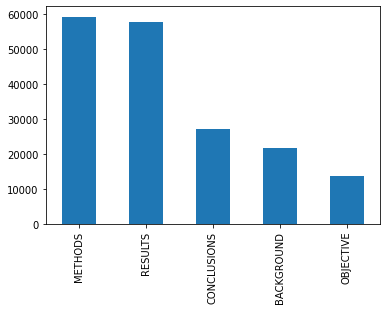

In [16]:
train_df["target"].value_counts().plot(kind = 'bar')

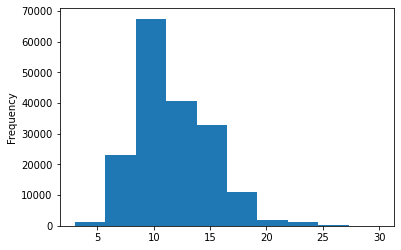

In [17]:
train_df.total_lines.plot(kind= "hist")

 Text Data Visualization Future work..

In [18]:
# Convert abstract text lines into lists 
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [19]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### One Hot Encoder


In [20]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Label encode labels

In [21]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [22]:
# Get class names and number of classes from LabelEncoder instance 
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Model 0: Getting a baseline

Our first model we'll be a TF-IDF Multinomial Naive Bayes as recommended by [Scikit-Learn's machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

we'll create a Scikit-Learn `Pipeline` which uses the [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) class to convert our abstract sentences to numbers using the TF-IDF (term frequency-inverse document frequecy) algorithm and then learns to classify our sentences using the [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) aglorithm.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences, 
            y=train_labels_encoded);

In [24]:

# Evaluate baseline on validation dataset
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

In [25]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [26]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-06-16 16:53:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-06-16 16:53:10 (79.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [27]:
# Import calculate_results helper function
from helper_functions import calculate_results

### Model_0 Results

In [28]:

# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

# Prepare Data For Deep Neural Network Models


When our model goes through our sentences, it works best when they're all the same length (this is important for creating batches of the same size tensors)

* Finding the average sentence length in the Dataset.

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [30]:
sen_len = [len(sentences.split()) for sentences in train_sentences]
avg_sen_len = np.mean(sen_len)
avg_sen_len

26.338269273494777

(array([4.2075e+04, 7.9624e+04, 3.8291e+04, 1.2725e+04, 4.3900e+03,
        1.6450e+03, 7.2600e+02, 2.8900e+02, 1.3600e+02, 5.5000e+01,
        2.9000e+01, 1.5000e+01, 1.1000e+01, 9.0000e+00, 8.0000e+00,
        5.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00]),
 array([  1.        ,  15.04761905,  29.0952381 ,  43.14285714,
         57.19047619,  71.23809524,  85.28571429,  99.33333333,
        113.38095238, 127.42857143, 141.47619048, 155.52380952,
        169.57142857, 183.61904762, 197.66666667, 211.71428571,
        225.76190476, 239.80952381, 253.85714286, 267.9047619 ,
        281.95238095, 296.        ]),
 <a list of 21 Patch objects>)

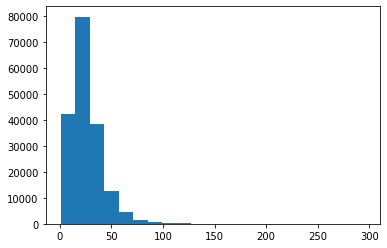

In [31]:
import matplotlib.pyplot as plt
plt.hist(sen_len,bins=21) # Checking the Sequence Length Distribution and getting most occurance  sequence length

Looks like the vast majority of sentences are between 0 and 50 tokens in length.

We can use NumPy's [`percentile`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) to find the value which covers 95% of the sentence lengthsHow long of a sentesnces cover majority of the data ? (95%)

In [32]:
np.percentile(sen_len,95)

55.0

In [33]:
max(sen_len)   # max length sentence in training set

296

Creaating a text vectorizer layer

### Create text vectorize

Section 3.2 of the [PubMed 200k RCT paper](https://arxiv.org/pdf/1710.06071.pdf) states the vocabulary size of the PubMed 20k dataset as 68,000. So we'll use that as our `max_tokens` parameter.
                   

In [34]:
max_tokens = 68000

In [35]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_tokens,standardize='lower_and_strip_punctuation',
                                    output_sequence_length=55)


In [36]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [37]:
# viewing vectorize training sentences
import random
target_sentence  = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
after @ months of stable-dose treatment , patients receiving milnacipran @ and/or @ mg/d had significant improvement in mfi total and subscale scores ( p < @ vs placebo ) .

Length of text: 31

Vectorized text:
[[   21    41     4 34172    19    12   245 12540   727  1306    55    37
    194     5 18393    76     3  2072   119    14    44    48     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [38]:
# Getting the vocabulary and showing most frequent and least frequest words in the vocabulary
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
most_common = rct_20k_text_vocab[:5]
least_common = rct_20k_text_vocab[-5:]
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"), 
print(f"Most common words in the vocabulary: {most_common}")
print(f"Least common words in the vocabulary: {least_common}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [39]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary_size': 64841}

### Create custom text embedding

To create a richer numerical representation of our text, we can use an **embedding**.

The `input_dim` parameter defines the size of our vocabulary. And the `output_dim` parameter defines the dimension of the embedding output.

Once created, our embedding layer will take the integer outputs of our `text_vectorization` layer as inputs and convert them to feature vectors of size `output_dim`.

In [40]:
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), 
                               output_dim= 128,
                               mask_zero=True,
                               input_length=55)



print(f"Sentence before Vectorization : \n{target_sentence}\n")
vec_sentence = text_vectorizer([target_sentence])
print(f"Sentence After vectorization :\n {vec_sentence}\n")
embed_sentence = token_embed(vec_sentence)
print(f"Embedding Sentence :\n{embed_sentence}\n")

Sentence before Vectorization : 
after @ months of stable-dose treatment , patients receiving milnacipran @ and/or @ mg/d had significant improvement in mfi total and subscale scores ( p < @ vs placebo ) .

Sentence After vectorization :
 [[   21    41     4 34172    19    12   245 12540   727  1306    55    37
    194     5 18393    76     3  2072   119    14    44    48     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Embedding Sentence :
[[[ 0.01845442  0.00490598  0.02234909 ... -0.0251475   0.02369246
   -0.03116907]
  [ 0.03540225 -0.01559786 -0.00104294 ... -0.0325914  -0.01999564
   -0.03067011]
  [ 0.01375339 -0.0441448  -0.03379129 ... -0.04563415 -0.04586704
    0.03887606]
  ...
  [-0.02985824 -0.01073467 -0.04434704 ...  0.0063103  -0.04246072
   -0.02347449]
  [-0.02985824 -0.01073467 -0.04434704 ...  0.0063103  -0.0

In [41]:
# Turn our data into TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [42]:
len(train_dataset) , train_dataset

(180040,
 <TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>)

In [43]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

## Model 1: Conv1D with token embedding

All of our deep models will follow a similar structure:

```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

In [44]:
inputs = layers.Input(shape = (1,),dtype = tf.string)
text_vector = text_vectorizer(inputs)
embed = token_embed(text_vector)
x = layers.Conv1D(filters = 64, kernel_size= 5, padding="same",activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01))(embed)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(num_classes,activation="softmax")(x)

model = tf.keras.Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
embedding (Embedding)        (None, 55, 128)           8299648   
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 64)            41024     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325   

In [45]:
len(train_dataset)

5627

In [46]:
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [47]:
model_1_history =  model.fit(train_dataset,
                             steps_per_epoch=int(0.1 * len(train_dataset)),
                             epochs = 10,
                             validation_data = valid_dataset,
                             validation_steps=int(0.1 * len(valid_dataset)),)

Epoch 1/10
562/562 [==============================] - 58s 101ms/step - loss: 1.1068 - accuracy: 0.6201 - val_loss: 0.7933 - val_accuracy: 0.7487
Epoch 2/10
562/562 [==============================] - 56s 100ms/step - loss: 0.7738 - accuracy: 0.7517 - val_loss: 0.7109 - val_accuracy: 0.7736
Epoch 3/10
562/562 [==============================] - 56s 100ms/step - loss: 0.7241 - accuracy: 0.7625 - val_loss: 0.6671 - val_accuracy: 0.7872
Epoch 4/10
562/562 [==============================] - 56s 100ms/step - loss: 0.6906 - accuracy: 0.7751 - val_loss: 0.6546 - val_accuracy: 0.7846
Epoch 5/10
562/562 [==============================] - 56s 100ms/step - loss: 0.6888 - accuracy: 0.7782 - val_loss: 0.6390 - val_accuracy: 0.7902
Epoch 6/10
562/562 [==============================] - 56s 100ms/step - loss: 0.6796 - accuracy: 0.7763 - val_loss: 0.6246 - val_accuracy: 0.7949
Epoch 7/10
562/562 [==============================] - 56s 100ms/step - loss: 0.6509 - accuracy: 0.7854 - val_loss: 0.6183 - val_ac

In [48]:
# Evaluate on whole validation dataset (we only validated on 10% of batches during training)
model.evaluate(valid_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.5962 - accuracy: 0.8083


[0.5962496995925903, 0.8082880973815918]

In [49]:
# Make predictions (our model outputs prediction probabilities for each class)
model_1_pred_probs = model.predict(valid_dataset)
model_1_pred_probs

array([[6.4009082e-01, 1.5787475e-01, 1.1690257e-02, 1.7012680e-01,
        2.0217434e-02],
       [2.1156156e-01, 7.0904827e-01, 1.1327777e-03, 7.0969328e-02,
        7.2881221e-03],
       [1.7376225e-01, 8.4552346e-03, 1.4700086e-03, 8.1595337e-01,
        3.5914412e-04],
       ...,
       [2.6505839e-04, 9.3591970e-04, 1.3166884e-02, 1.3237984e-04,
        9.8549968e-01],
       [2.4481107e-02, 5.5618656e-01, 4.2747390e-02, 1.6767828e-02,
        3.5981715e-01],
       [9.1729127e-02, 8.6072636e-01, 1.3366650e-02, 1.7221529e-02,
        1.6956387e-02]], dtype=float32)

In [50]:
# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 1, 1])>

### Model_1 Results

In [51]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 80.8288097444724,
 'f1': 0.8054731032957875,
 'precision': 0.8047795569207609,
 'recall': 0.808288097444724}

## Model 2: Feature extraction with pretrained token embedding (USE)

Here We use Universal Sentence Encoder here from TF-HUB.

Since we're moving towards replicating the model architecture in [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), it mentions they used a [pretrained GloVe embedding](https://nlp.stanford.edu/projects/glove/) as a way to initialise their token embeddings.


The model structure will look like:

```
Inputs (string) -> Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder) -> Layers -> Output (prediction probabilities)
```

In [52]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

Beautiful, now our pretrained USE is downloaded and instantiated as a `hub.KerasLayer` instance, let's test it out on a random sentence

In [53]:
# Test out the embedding on a random sentence
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
the subjects in the test group practiced cthe , while those in the control group did `` the @th radio calisthenics '' , an official recommended calisthenics for promoting healthcare in china , @ times a week , and @ weeks practicing overall .

Sentence after embedding:
[-0.04633829 -0.03948136  0.02896223 -0.07942989 -0.01642509  0.03321299
  0.04372008 -0.01696645 -0.03029537  0.0055867   0.0817182   0.0511634
  0.02764668 -0.04249508  0.02601314  0.02671395 -0.08149037  0.02041833
 -0.05118315 -0.02549118 -0.02749129 -0.02932397 -0.07956979 -0.02773482
 -0.03448042  0.03734251 -0.066794    0.01424676 -0.06487625 -0.05911339] (truncated output)...

Length of sentence embedding:
512


In [54]:
# Define feature extractor model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
# x = layers.Dropout(0.2)(x)
outputs = layers.Dense(5, activation="softmax",kernel_regularizer=None)(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [55]:
# Get a summary of the model
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
universal_sentence_encoder ( (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [56]:
model_2_history =  model_2.fit(train_dataset,
                             steps_per_epoch=int(0.1 * len(train_dataset)),
                             epochs = 10,
                             validation_data = valid_dataset,
                             validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/10
562/562 [==============================] - 9s 12ms/step - loss: 0.9225 - accuracy: 0.6502 - val_loss: 0.7968 - val_accuracy: 0.6908
Epoch 2/10
562/562 [==============================] - 6s 11ms/step - loss: 0.7692 - accuracy: 0.7017 - val_loss: 0.7549 - val_accuracy: 0.7071
Epoch 3/10
562/562 [==============================] - 6s 11ms/step - loss: 0.7528 - accuracy: 0.7127 - val_loss: 0.7393 - val_accuracy: 0.7128
Epoch 4/10
562/562 [==============================] - 7s 12ms/step - loss: 0.7198 - accuracy: 0.7244 - val_loss: 0.7123 - val_accuracy: 0.7287
Epoch 5/10
562/562 [==============================] - 6s 11ms/step - loss: 0.7267 - accuracy: 0.7219 - val_loss: 0.6904 - val_accuracy: 0.7317
Epoch 6/10
562/562 [==============================] - 6s 12ms/step - loss: 0.7185 - accuracy: 0.7254 - val_loss: 0.6832 - val_accuracy: 0.7350
Epoch 7/10
562/562 [==============================] - 6s 11ms/step - loss: 0.6862 - accuracy: 0.7390 - val_loss: 0.6673 - val_accuracy: 0.7463

In [57]:
# Evaluate on whole validation dataset
model_2.evaluate(valid_dataset)

945/945 [==============================] - 9s 9ms/step - loss: 0.6559 - accuracy: 0.7511


[0.6559162139892578, 0.7510591745376587]

In [58]:
# Make predictions with feature extraction model
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

array([[4.20623630e-01, 4.38490957e-01, 6.25136832e-04, 1.32154837e-01,
        8.10540374e-03],
       [3.23061615e-01, 5.82224965e-01, 1.88950659e-03, 9.16711688e-02,
        1.15277513e-03],
       [4.91145968e-01, 4.19516787e-02, 1.88930240e-02, 4.06143695e-01,
        4.18655388e-02],
       ...,
       [7.41388998e-04, 7.53519998e-04, 2.20944248e-02, 2.34126986e-04,
        9.76176500e-01],
       [3.42314062e-03, 6.01526648e-02, 1.98868886e-01, 8.81478831e-04,
        7.36673832e-01],
       [4.39007245e-02, 8.41824710e-01, 1.04148194e-01, 9.37066041e-04,
        9.18926578e-03]], dtype=float32)

In [59]:
# Convert the predictions with feature extraction model to classes
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 0, ..., 4, 4, 1])>

### Model_2 Results

In [60]:
# Calculate results from TF Hub pretrained embeddings results on validation set
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.10591817820733,
 'f1': 0.746383502412015,
 'precision': 0.7457372543188239,
 'recall': 0.7510591817820733}

## Model 3: Conv1D with character embedding

### Creating a character-level tokenizer

The [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) paper mentions their model uses a hybrid of token and character embeddings.

The difference between a character and token embedding is that the **character embedding** is created using sequences split into characters (e.g. `hello` -> [`h`, `e`, `l`, `l`, `o`]) where as a **token embedding** is created on sequences split into tokens.

*Token level embeddings split sequences into tokens (words) and embeddings each of them, character embeddings split sequences into characters and creates a feature vector for each.*

Before we can vectorize our sequences on a character-level we'll need to split them into characters. Let's write a function to do so

In [61]:
" ".join(list(train_sentences[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [62]:
def split_chars(text):
  return " ".join(list(text))

split_chars(random_training_sentence)

"t h e   s u b j e c t s   i n   t h e   t e s t   g r o u p   p r a c t i c e d   c t h e   ,   w h i l e   t h o s e   i n   t h e   c o n t r o l   g r o u p   d i d   ` `   t h e   @ t h   r a d i o   c a l i s t h e n i c s   ' '   ,   a n   o f f i c i a l   r e c o m m e n d e d   c a l i s t h e n i c s   f o r   p r o m o t i n g   h e a l t h c a r e   i n   c h i n a   ,   @   t i m e s   a   w e e k   ,   a n d   @   w e e k s   p r a c t i c i n g   o v e r a l l   ."

In [63]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [64]:
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [65]:
# Check the Avrage Char Length in the training Sentences
char_lens = [len(sentence) for sentence in train_sentences]
avg_char_lens = sum(char_lens)/len(char_lens)
avg_char_lens

149.3662574983337

(array([1.2341e+04, 5.0061e+04, 5.6508e+04, 3.4345e+04, 1.5779e+04,
        6.5770e+03, 2.4690e+03, 1.0890e+03, 4.4400e+02, 1.9900e+02,
        1.0500e+02, 5.0000e+01, 2.4000e+01, 1.9000e+01, 1.1000e+01,
        7.0000e+00, 4.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 5.6400e+01, 1.1180e+02, 1.6720e+02, 2.2260e+02,
        2.7800e+02, 3.3340e+02, 3.8880e+02, 4.4420e+02, 4.9960e+02,
        5.5500e+02, 6.1040e+02, 6.6580e+02, 7.2120e+02, 7.7660e+02,
        8.3200e+02, 8.8740e+02, 9.4280e+02, 9.9820e+02, 1.0536e+03,
        1.1090e+03, 1.1644e+03, 1.2198e+03, 1.2752e+03, 1.3306e+03,
        1.3860e+03]),
 <a list of 25 Patch objects>)

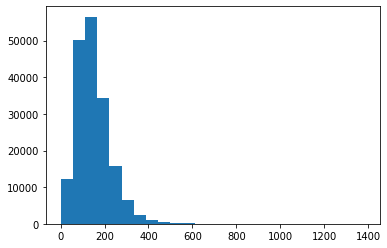

In [66]:
import matplotlib.pyplot as plt
plt.hist(char_lens,bins =25)

Okay, looks like most of our sequences are between 0 and 200 characters long.

Let's use NumPy's percentile to figure out what length covers 95% of our sequences

In [67]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [68]:
random.choice(train_sentences)

'in patients with her@-positive metastatic breast cancer , the addition of pertuzumab to trastuzumab and docetaxel , as compared with the addition of placebo , significantly improved the median overall survival to @ months and extended the results of previous analyses showing the efficacy of this drug combination .'

In [69]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [70]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [71]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [72]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
a   c h e s t   x - r a y   w a s   t a k e n   a t   p o s t o p e r a t i v e   d a y   @   ,   a n d   t h e   r e s i d u a l   i n t r a a b d o m i n a l   g a s   v o l u m e   w a s   m e a s u r e d   .

Length of chars: 88

Vectorized chars:
[[ 5 11 13  2  9  3 24  8  5 19 20  5  9  3  5 23  2  6  5  3 14  7  9  3
   7 14  2  8  5  3  4 21  2 10  5 19  5  6 10  3 13  2  8  2  9  4 10 16
   5 12  4  6  3  8  5  5 22 10  7 15  4  6  5 12 18  5  9 21  7 12 16 15
   2 20  5  9 15  2  5  9 16  8  2 10  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

### Creating a character-level embedding
We've got a way to vectorize our character-level sequences, now's time to create a character-level embedding.

The input dimension (`input_dim`) will be equal to the number of different characters in our `char_vocab` (28). And since we're following the structure of the model in Figure 1 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), the output dimension of the character embedding (`output_dim`) will be 25.

In [73]:
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS,
                              output_dim= 25,
                              mask_zero= True, 
                              name= "char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
a   c h e s t   x - r a y   w a s   t a k e n   a t   p o s t o p e r a t i v e   d a y   @   ,   a n d   t h e   r e s i d u a l   i n t r a a b d o m i n a l   g a s   v o l u m e   w a s   m e a s u r e d   .

Embedded chars (after vectorization and embedding):
[[[ 0.01198739  0.01475773  0.00853588 ...  0.04154284 -0.00139939
   -0.04978269]
  [ 0.03823442  0.02977749 -0.03549073 ... -0.03217635 -0.00892054
    0.03190038]
  [ 0.00683529  0.01736682  0.00283471 ... -0.00423067 -0.00172087
    0.01615829]
  ...
  [ 0.00047475  0.01790795 -0.0195184  ... -0.03690598  0.01174641
    0.02456704]
  [ 0.00047475  0.01790795 -0.0195184  ... -0.03690598  0.01174641
    0.02456704]
  [ 0.00047475  0.01790795 -0.0195184  ... -0.03690598  0.01174641
    0.02456704]]]

Character embedding shape: (1, 290, 25)


Before fitting our model on the data, we'll create char-level batched `PrefetchedDataset`'s.

In [74]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

### Building a Conv1D model to fit on character embeddings
Now we've got a way to turn our character-level sequences into numbers (`char_vectorizer`) as well as numerically represent them as an embedding (`char_embed`) let's test how effective they are at encoding the information in our sequences by creating a character-level sequence model.

The model will have the same structure as our custom token embedding model (`model_1`) except it'll take character-level sequences as input instead of token-level sequences.

```
Input (character-level text) -> Tokenize -> Embedding -> Layers (Conv1D, GlobalMaxPool1D) -> Output (label probability)

In [75]:
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01))(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
char_vectorizer (TextVectori (None, 290)               0         
_________________________________________________________________
char_embed (Embedding)       (None, 290, 25)           1750      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 290, 64)           8064      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 10,139
Trainable params: 10,139
Non-trainable params: 0
_________________________________

In [76]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=10,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/10
562/562 [==============================] - 14s 23ms/step - loss: 1.4009 - accuracy: 0.4576 - val_loss: 1.2213 - val_accuracy: 0.5432
Epoch 2/10
562/562 [==============================] - 13s 23ms/step - loss: 1.1807 - accuracy: 0.5530 - val_loss: 1.1203 - val_accuracy: 0.6001
Epoch 3/10
562/562 [==============================] - 13s 23ms/step - loss: 1.1121 - accuracy: 0.5955 - val_loss: 1.0601 - val_accuracy: 0.6303
Epoch 4/10
562/562 [==============================] - 13s 23ms/step - loss: 1.0576 - accuracy: 0.6207 - val_loss: 1.0272 - val_accuracy: 0.6400
Epoch 5/10
562/562 [==============================] - 13s 23ms/step - loss: 1.0327 - accuracy: 0.6365 - val_loss: 1.0117 - val_accuracy: 0.6592
Epoch 6/10
562/562 [==============================] - 13s 24ms/step - loss: 1.0137 - accuracy: 0.6437 - val_loss: 0.9768 - val_accuracy: 0.6576
Epoch 7/10
562/562 [==============================] - 13s 24ms/step - loss: 0.9968 - accuracy: 0.6497 - val_loss: 0.9487 - val_accuracy:

In [77]:
# Evaluate model_3 on whole validation char dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 6s 7ms/step - loss: 0.9418 - accuracy: 0.6693


[0.941790759563446, 0.6693366765975952]

In [78]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

array([[0.21880805, 0.47745466, 0.06887063, 0.17308971, 0.06177694],
       [0.23530294, 0.43719485, 0.00282957, 0.3047214 , 0.01995131],
       [0.15760659, 0.33806348, 0.04908546, 0.3893838 , 0.06586069],
       ...,
       [0.01113645, 0.02624117, 0.0150859 , 0.00669696, 0.9408395 ],
       [0.01904003, 0.16237463, 0.07217802, 0.01535511, 0.7310522 ],
       [0.17195038, 0.6881715 , 0.10410943, 0.01864745, 0.01712121]],
      dtype=float32)

In [79]:
# Convert predictions to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

### Model_3 Results

In [80]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 66.93366874089766,
 'f1': 0.6597343453210113,
 'precision': 0.6638601787800059,
 'recall': 0.6693366874089766}

## Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

In moving closer to build a model similar to the one in Figure 1 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), it's time we tackled the hybrid token embedding layer they speak of.

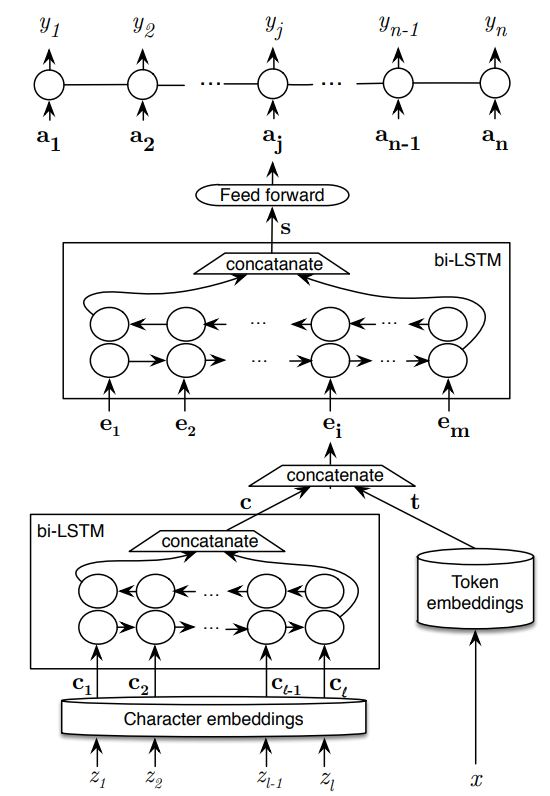
* This hybrid token embedding layer is a combination of token embeddings and character embeddings. In other words, they create a stacked embedding to represent sequences before passing them to the sequence label prediction layer


To start replicating (or getting close to replicating) the model in Figure 1, we're going to go through the following steps:
1. Create a token-level model (similar to `model_1`)
2. Create a character-level model (similar to `model_3` with a slight modification to reflect the paper)
3. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 1 and 2
4. Build a series of output layers on top of 3 similar to Figure 1 and section 4.2 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
5. Construct a model which takes token and character-level sequences as input and produces sequence label probabilities as output

In [81]:
1 # Token_level Model (using Pretrained -- Universal Sentence Encoder)
token_inputs = layers.Input(shape = [], dtype= tf.string, name = "token_input")
token_embedding = tf_hub_embedding_layer(token_inputs)
token_dense = layers.Dense(128,activation="relu")(token_embedding)
token_model = tf.keras.Model(inputs = token_inputs,
                             outputs = token_dense)

2 # char_level Model
char_inputs = layers.Input(shape=(1,), dtype= tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embedding = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25,activation="relu"))(char_embedding)
char_model = tf.keras.Model(inputs= char_inputs,    # char_dense = layers.Dense(128,activation="relu")(char_bilstm)
                            outputs =char_bi_lstm)


3 # Now Concatenate token_model and char_model 
concat_layer = layers.Concatenate(name = "token_char_hybrid")([token_model.output, 
                                                               char_model.output])

4 # Add Some Layer on top of concat_layer
concat_dropout = layers.Dropout(0.5)(concat_layer)
concat_dense = layers.Dense(256,activation="relu")(concat_dropout)
final_dropout = layers.Dropout(0.2)(concat_dense)
output_layer = layers.Dense(num_classes,activation="softmax")(final_dropout)

model_4 = tf.keras.Model(inputs = [token_model.input, char_model.input], 
                         outputs = output_layer,
                         name="model_4_token_and_char_embeddings")



In [82]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_input[0][0]                 
__________________________________________________________________________________________________
universal_sentence_encoder (Ker (None, 512)          256797824   token_input[0][0]                
__________________________________________________________________

### Visualize the Hybrid Model

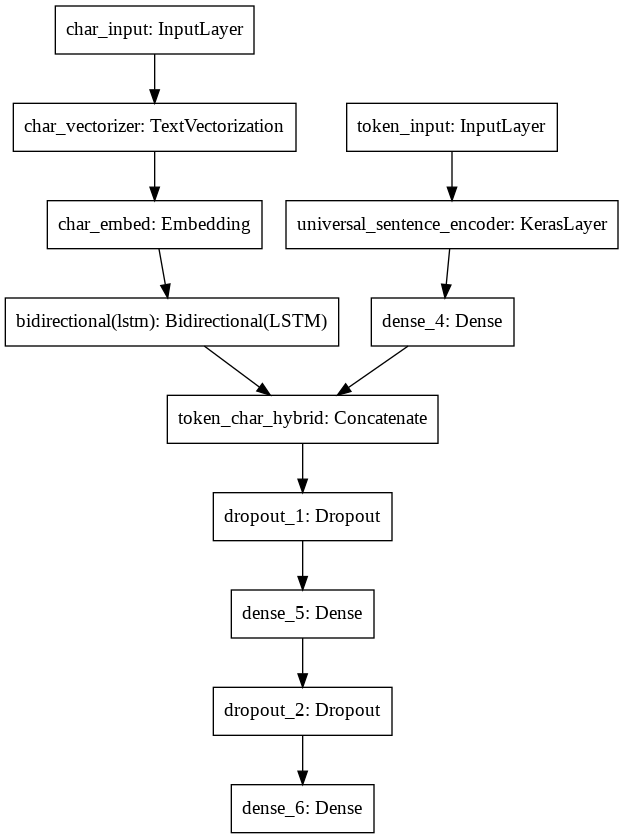

In [83]:
tf.keras.utils.plot_model(
    model_4, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [84]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])

In [85]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [86]:
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>)

In [87]:
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=10,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/10
562/562 [==============================] - 167s 289ms/step - loss: 0.9316 - accuracy: 0.6286 - val_loss: 0.7693 - val_accuracy: 0.7048
Epoch 2/10
562/562 [==============================] - 162s 288ms/step - loss: 0.7773 - accuracy: 0.6966 - val_loss: 0.7133 - val_accuracy: 0.7271
Epoch 3/10
562/562 [==============================] - 163s 290ms/step - loss: 0.7541 - accuracy: 0.7097 - val_loss: 0.6872 - val_accuracy: 0.7424
Epoch 4/10
562/562 [==============================] - 163s 290ms/step - loss: 11.8752 - accuracy: 0.7228 - val_loss: 0.6679 - val_accuracy: 0.7463
Epoch 5/10
562/562 [==============================] - 163s 291ms/step - loss: 0.7405 - accuracy: 0.7171 - val_loss: 0.6611 - val_accuracy: 0.7473
Epoch 6/10
562/562 [==============================] - 164s 291ms/step - loss: 0.7305 - accuracy: 0.7208 - val_loss: 0.6454 - val_accuracy: 0.7580
Epoch 7/10
562/562 [==============================] - 164s 292ms/step - loss: 0.7063 - accuracy: 0.7299 - val_loss: 0.6443 

In [88]:
# Evaluate on the whole validation dataset
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 58s 61ms/step - loss: 23792656.0000 - accuracy: 0.7598


[23792656.0, 0.7598305344581604]

In [89]:
# Make predictions using the token-character model hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

array([[4.81065422e-01, 3.40999186e-01, 1.79997389e-03, 1.66568533e-01,
        9.56688821e-03],
       [2.74215668e-01, 6.57577336e-01, 1.48074096e-03, 6.47516549e-02,
        1.97461597e-03],
       [4.36756134e-01, 5.47802337e-02, 5.64954877e-02, 4.24435914e-01,
        2.75322516e-02],
       ...,
       [1.14926996e-04, 4.47407336e-04, 1.09152636e-02, 4.81208008e-05,
        9.88474309e-01],
       [9.39613860e-03, 6.19878434e-02, 1.74138308e-01, 2.82176491e-03,
        7.51655936e-01],
       [6.84660450e-02, 8.80190194e-01, 4.18375172e-02, 2.41007935e-03,
        7.09615275e-03]], dtype=float32)

In [90]:
# Turn prediction probabilities into prediction classes
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 0, ..., 4, 4, 1])>

In [91]:
# Get results of token-char-hybrid model
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 75.98305309148682,
 'f1': 0.7545412454754323,
 'precision': 0.7561886438045121,
 'recall': 0.7598305309148683}

## Model 5: Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

As it's a Sequential classification problem the sequences come in a particular order. Like *OBJECTIVE* comes first rather then *CONCLUSION*.

Abstracts typically come in a sequential order, such as:

* `OBJECTIVE` ...
* `METHODS` ...
* `METHODS` ...
* `METHODS` ...
* `RESULTS` ...
* `CONCLUSIONS` ...

Or

* `BACKGROUND` ...
* `OBJECTIVE` ...
* `METHODS` ...
* `METHODS` ...
* `RESULTS` ...
* `RESULTS` ...
* `CONCLUSIONS` ...


Here we do some Feature Engineering so that our model can learn the order sentences in the Abstract and know where the sentence appear in the Abstract. The `"line_number"` and `"total_lines"` columns are features which didn't necessarily come with the training data but can be passed to our model as a **positional embedding**.

***Positional Embedding make your model include the information about order of the input. The positional encoding step allows the model to recognize which part of the sequence an input belongs to.***

But to avoid our model thinking a line with "line_number"=5 is five times greater than a line with "line_number"=1, we'll use one-hot-encoding to encode our "line_number" and "total_lines" features.

That is why we have to use one-hot encoding. We use tf.one_hot for it.

In [92]:
# Checking the Distribution of line Number in The data.
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

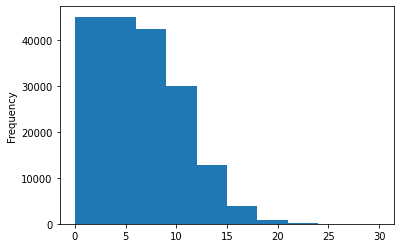

In [93]:
# Check the distribution of line numbers
train_df.line_number.plot.hist()

Looking at the distribution of the "line_number" column, it looks like the majority of lines have a position of 15 or less.

Knowing this, let's set the depth parameter of tf.one_hot to 15.

In [94]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(),depth= 15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(),depth= 15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(),depth= 15)

In [96]:
# Check one-hot encoded "line_number" feature samples
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]), <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.,

We could create a one-hot tensor which has room for all of the potential values of "line_number" (depth=30), however, this would end up in a tensor of double the size of our current one (depth=15) where the vast majority of values are 0. Plus, only ~2,000/180,000 samples have a "line_number" value of over 15. So we would not be gaining much information about our data for doubling our feature space. This kind of problem is called the curse of dimensionality. However, since this we're working with deep models, it might be worth trying to throw as much information at the model as possible and seeing what happens. I'll leave exploring values of the depth parameter as an extension.

We can do the same above process for the total line also in data.

In [97]:
# How many different numbers of lines are there?
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

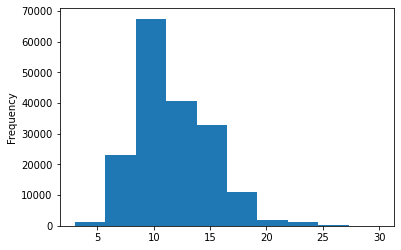

In [98]:
# Check the distribution of total lines
train_df.total_lines.plot.hist();

It shows that majority of data has line number below 20. We can perform numpy percentile to check this.

In [101]:
# Check the coverage of a "total_lines" value of 20
np.percentile(train_df.total_lines, 98) # a value of 20 covers 98% of samples

20.0

In [102]:
# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column 
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]), <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

### Creating The Beast (tribrid embedding model)

Steps for Creating the Model:
1. Create a token-level model (similar to `model_1`)
2. Create a character-level model (similar to `model_3` with a slight modification to reflect the paper)
3. Create a `"line_number"` model (takes in one-hot-encoded `"line_number"` tensor and passes it through a non-linear layer)
4. Create a `"total_lines"` model (takes in one-hot-encoded `"total_lines"` tensor and passes it through a non-linear layer)
5. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 1 and 2 into a token-character-hybrid embedding and pass it series of output to Figure 1 and section 4.2 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
6. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 3, 4 and 5 into a token-character-positional tribrid embedding 
7. Create an output layer to accept the tribrid embedding and output predicted label probabilities
8. Combine the inputs of 1, 2, 3, 4 and outputs of 7 into a [`tf.keras.Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [103]:

# 1. Token Model
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)



# 2. Char Model
char_inputs = layers.Input(shape=(1,), dtype= tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embedding = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25,activation="relu"))(char_embedding)
char_model = tf.keras.Model(inputs= char_inputs,    # char_dense = layers.Dense(128,activation="relu")(char_bilstm)
                            outputs =char_bi_lstm)


# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)


# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output, 
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input, 
                                 char_model.input],
                         outputs=output_layer)

In [104]:
model_5.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_inputs (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_input[0][0]                 
__________________________________________________________________________________________________
universal_sentence_encoder (Ker (None, 512)          256797824   token_inputs[0][0]               
____________________________________________________________________________________________

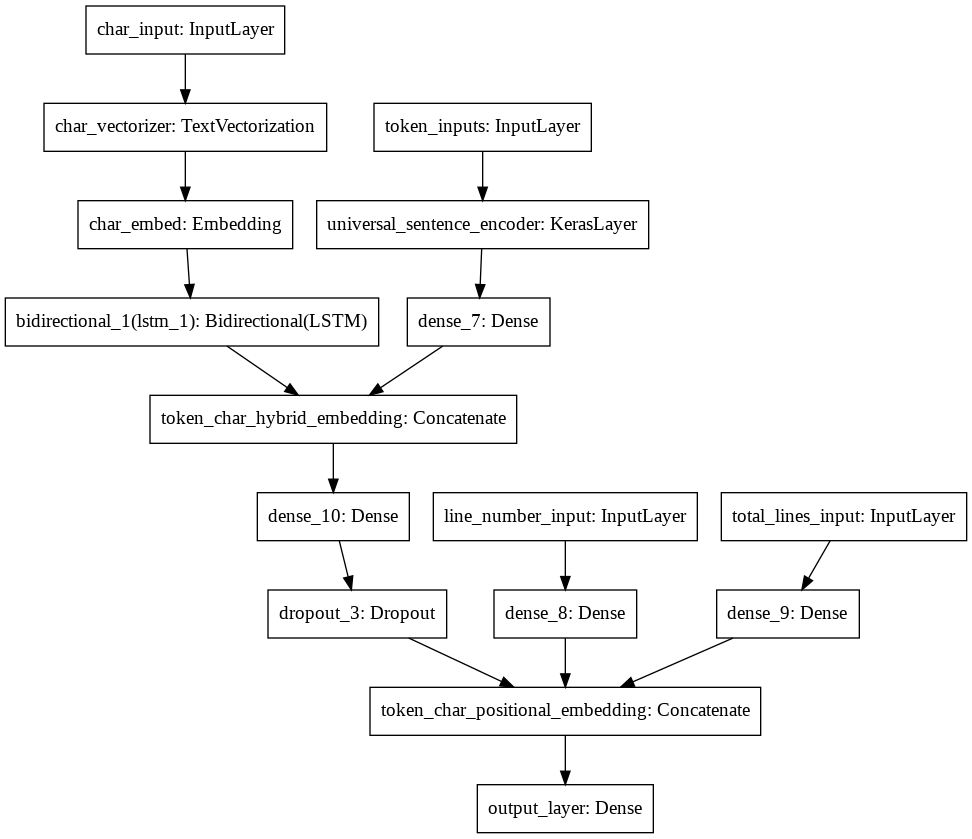

In [105]:
# Plot the token, char, positional embedding model
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [106]:
model_5.compile(loss =tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), optimizer="Adam", metrics= ["accuracy"])

In [107]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>)

In [109]:
# Fit the token, char and positional embedding model
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=10,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/10
562/562 [==============================] - 166s 296ms/step - loss: 1.0464 - accuracy: 0.7606 - val_loss: 0.9803 - val_accuracy: 0.8042
Epoch 2/10
562/562 [==============================] - 166s 296ms/step - loss: 0.9671 - accuracy: 0.8126 - val_loss: 0.9522 - val_accuracy: 0.8235
Epoch 3/10
562/562 [==============================] - 167s 297ms/step - loss: 0.9502 - accuracy: 0.8240 - val_loss: 0.9400 - val_accuracy: 0.8301
Epoch 4/10
562/562 [==============================] - 166s 296ms/step - loss: 0.9417 - accuracy: 0.8320 - val_loss: 0.9343 - val_accuracy: 0.8314
Epoch 5/10
562/562 [==============================] - 166s 296ms/step - loss: 0.9384 - accuracy: 0.8335 - val_loss: 0.9268 - val_accuracy: 0.8378
Epoch 6/10
562/562 [==============================] - 167s 297ms/step - loss: 0.9414 - accuracy: 0.8290 - val_loss: 0.9242 - val_accuracy: 0.8391
Epoch 7/10
562/562 [==============================] - 167s 298ms/step - loss: 0.9288 - accuracy: 0.8379 - val_loss: 0.9248 -

In [110]:
# Make predictions with token-char-positional hybrid model
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 60s 62ms/step


array([[0.55797863, 0.11753111, 0.01437984, 0.28599715, 0.02411333],
       [0.5643995 , 0.12752993, 0.05248916, 0.24036951, 0.01521185],
       [0.35432863, 0.09137847, 0.1489166 , 0.3426122 , 0.06276409],
       ...,
       [0.02403956, 0.04742315, 0.01662572, 0.02715172, 0.88475984],
       [0.02105152, 0.34086674, 0.04562447, 0.02258216, 0.56987506],
       [0.10035124, 0.76991165, 0.05545753, 0.04023053, 0.03404894]],
      dtype=float32)

In [111]:
# Turn prediction probabilities into prediction classes
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 1])>

In [112]:
# Calculate results of token-char-positional hybrid model
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 84.80074142724744,
 'f1': 0.8445848608307035,
 'precision': 0.8499109192748401,
 'recall': 0.8480074142724745}

In [113]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,80.828810,0.804780,0.808288,0.805473
pretrained_token_embed,75.105918,0.745737,0.751059,0.746384
custom_char_embed_conv1d,66.933669,0.663860,0.669337,0.659734
hybrid_char_token_embed,75.983053,0.756189,0.759831,0.754541
tribrid_pos_char_token_embed,84.800741,0.849911,0.848007,0.844585


In [114]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

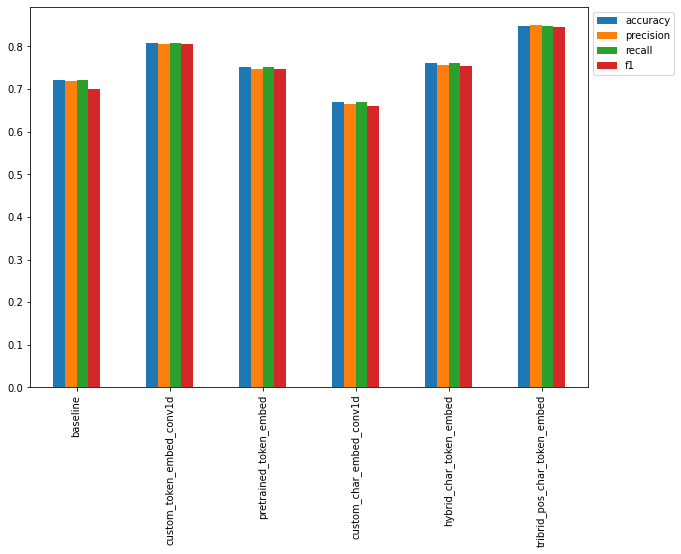

In [115]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

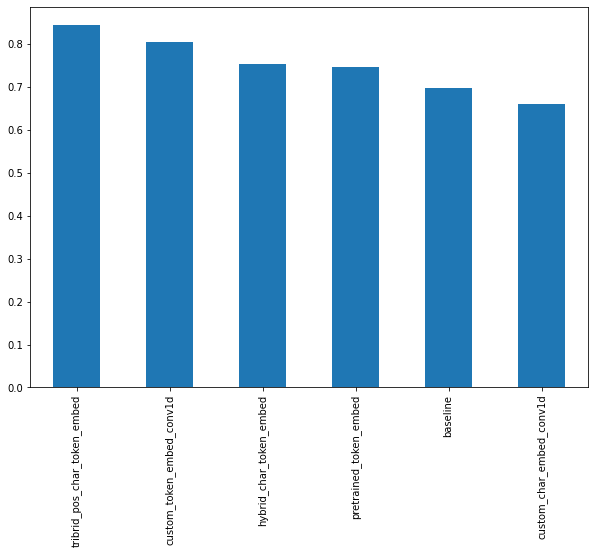

In [116]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [118]:
# Save best performing model to SavedModel format (default)
model_5.save("tribrid_model") 

INFO:tensorflow:Assets written to: tribrid_model/assets


INFO:tensorflow:Assets written to: tribrid_model/assets


In [119]:
model_path = "/content/tribrid_model"

In [120]:
loaded_model = tf.keras.models.load_model(model_path)

In [121]:
loaded_pred_probs = loaded_model.predict(val_pos_char_token_dataset, verbose=1)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

945/945 [==============================] - 61s 63ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 2, 2, 4, 4, 4, 4, 1])>

In [122]:
# Evaluate loaded model's predictions
loaded_model_results = calculate_results(val_labels_encoded,
                                         loaded_preds)
loaded_model_results

{'accuracy': 84.80074142724744,
 'f1': 0.8445848608307035,
 'precision': 0.8499109192748401,
 'recall': 0.8480074142724745}

### Evaluate model on test dataset

To make our model's performance more comparable with the results reported in Table 3 of the [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf) paper, let's make predictions on the test dataset and evaluate them.

In [123]:
# Create test dataset batch and prefetched
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Check shapes
test_pos_char_token_dataset

<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>

In [124]:
# Make predictions on the test dataset
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 58s 62ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 4, 4, 1, 1, 0])>

In [125]:
# Evaluate loaded model test predictions
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 84.48979591836735,
 'f1': 0.8415058973152829,
 'precision': 0.8456318536204341,
 'recall': 0.8448979591836735}

In [127]:
%%time
# Get list of class names of test predictions
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 3.43 s, sys: 10 ms, total: 3.44 s
Wall time: 3.44 s


In [128]:
# Create prediction-enriched test dataframe
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(20)

,target,text,line_number,total_lines,prediction,pred_prob,correct
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,OBJECTIVE,0.359128,False
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,METHODS,0.395141,False
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.857965,False
3,RESULTS,survival analyses were used to assess the asso...,3,8,METHODS,0.733716,False
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,RESULTS,0.734855,True
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8,RESULTS,0.888223,True
6,RESULTS,multivariable analyses revealed that patients ...,6,8,RESULTS,0.569608,True
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8,CONCLUSIONS,0.476394,True
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8,CONCLUSIONS,0.583600,True
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12,BACKGROUND,0.633004,True
